In [1]:
import pandas as pd
import csv
import os
import pandas as pd
import numpy as np
import math
import os,sys
import pandas as pd
import pickle



# Loading September 2015 green taxi data

There are 1494926 rows and 21 columns in green cap September 2015 data.

In [2]:
green_2015_09 =pd.read_csv("/Users/kimjisun/Documents/simonKim/green_tripdata_2015-09.csv")

In [3]:
print green_2015_09.shape

(1494926, 21)


## Histogram of the number of the trip distances.   

In [4]:
import matplotlib.pyplot as plt
import math 
fig=plt.figure(figsize=(20,10))

In [5]:
#Distribution of Trip_distance
green_2015_09['Trip_distance'].describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

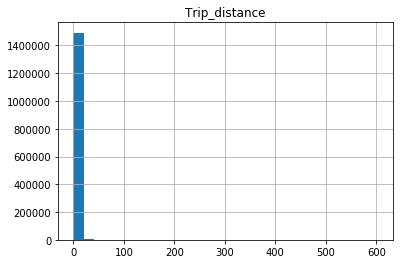

In [6]:
#We can see tht there are some extreme outliers in the data
hist_green = green_2015_09[['Trip_distance']].hist(bins=30)

I removed some outliers by using IQR method  Q3 + 1.5*(Q3- Q1) to check the details about the distribution.

In [7]:
green_outlier_thresh= 3.74 + 1.5*(3.74 - 1.1)
filtered_trip_distance_green = green_2015_09.loc[green_2015_09['Trip_distance'] <= green_outlier_thresh, 'Trip_distance']

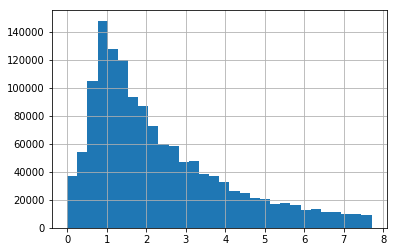

In [8]:
filtered_trip_distance_green.hist(bins=30)

## About Structure  

We can see that the distributions of the trip distance is highly right skewed. Thus it has a really long tail even after we removed some extreme outliers.  

Through this structure, I made a following hypothesis

"Top 20% of passengers in trip distances generated roughly 40%~50% of total trip distances from all passengers in September 2015."

"Additionally, I could also say top 20% of passengers in trip distances generated roughly 40%~50% of total amount charged to the all passengers in September 2015 because usually total amount charged proportional to trip distance" 

In [10]:
green_2015_09[['Trip_distance']].quantile([0.5,0.75,0.8,0.9])

,Trip_distance
0.50,1.98
0.75,3.74
0.80,4.38
0.90,6.55


In [20]:
filtered_trip_distance_green[['Trip_distance']].quantile([0.5,0.75,0.8,0.9])

,Trip_distance
0.50,1.80
0.75,3.24
0.80,3.70
0.90,5.01


In [4]:
print "Total distances from below 50% of users: " + str(green_2015_09[green_2015_09['Trip_distance']<=1.98]['Trip_distance'].sum()) + " miles"
print "Total fare from below 50% of users: $ " + str(green_2015_09[green_2015_09['Trip_distance']<=1.98]['Total_amount'].sum())

Total distances from below 50% of users: 816619.8799999998 miles
Total fare from below 50% of users: $ 6476993.249999999


In [5]:
print "Total distances from mid 30% of users: " + str(green_2015_09[(green_2015_09['Trip_distance']>1.98) & (green_2015_09['Trip_distance']<=4.38) ]['Trip_distance'].sum()) + " miles"
print "Total fare from mid 30% of users: $" + str(green_2015_09[(green_2015_09['Trip_distance']>1.98) & (green_2015_09['Trip_distance']<=4.38) ]['Total_amount'].sum())

Total distances from mid 30% of users: 1323828.52 miles
Total fare from mid 30% of users: $6835716.8500000015


In [6]:
print "Total distances from top 10% of users: " + str(green_2015_09[green_2015_09['Trip_distance']>4.38]['Trip_distance'].sum()) + " miles" 
print "Total fare from top 10%  of users: $ " + str(green_2015_09[(green_2015_09['Trip_distance']>4.38) ]['Total_amount'].sum())

Total distances from top 10% of users: 2296702.5300000003 miles
Total fare from top 10%  of users: $ 9159235.42


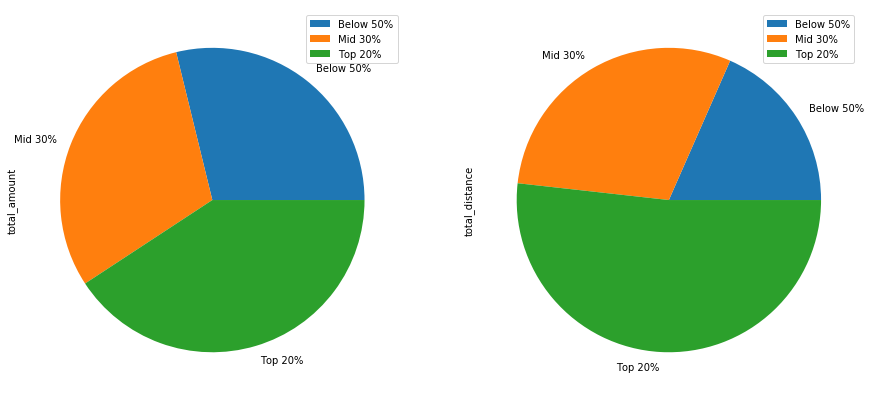

In [26]:
df = pd.DataFrame({'total_distance': [816619.88, 1323828.52, 2296702.53],
                  'total_amount': [6476993.249999999, 6835716.8500000015, 9159235.42]},
                   index=['Below 50%', 'Mid 30%', 'Top 20%'])

total_distance = pd.DataFrame(data=df)
#total_distance.plot.pie(y='total_distance')
plot = df.plot.pie(subplots=True, figsize=(15, 7))

In [30]:
#Trip Distance
total= 816619.8799999998 + 1323828.52 + 2296702.5300000003
print "Total trip miles from all passengers: "+ str(total) + " miles"
print 'Passengers in Below 50%: ' + str(816619.8799999998/total * 100 )+ " % of total trip distances from all passengers "
print 'Passengers in mid 30%: ' + str(1323828.52/total * 100) + " % of total trip distances from all passengers "
print 'Passengers in top 20%: ' + str(2296702.5300000003/total  * 100) + " % of total trip distances from all passengers "

Total trip miles from all passengers: 4437150.93 miles
Passengers in Below 50%: 18.4041492589 % of total trip distances from all passengers 
Passengers in mid 30%: 29.8351023187 % of total trip distances from all passengers 
Passengers in top 20%: 51.7607484224 % of total trip distances from all passengers 


In [31]:
#Total_amount
total= 6476993.249999999 + 6835716.8500000015 + 9159235.42
print "Total amount charged from all passengers: $"+  str(total)
print 'Passengers in Below 50%: ' + str(6476993.249999999/total * 100) + " % of total amount charged from all passengers "
print 'Passengers in Below 50%: ' + str(6835716.8500000015/total* 100) + " % of total amount charged from all passengers "
print 'Passengers in top 20%: ' + str(9159235.42/total * 100) + " % of total amount charged from all passengers "

Total amount charged from all passengers: $22471945.52
Passengers in Below 50%: 28.8225745485 % of total amount charged from all passengers 
Passengers in Below 50%: 30.4188920533 % of total amount charged from all passengers 
Passengers in top 20%: 40.7585333982 % of total amount charged from all passengers 


### Future works

* Additional analysis to check some abnormal data
* Comfirm that whether these abnormal data make sense or not.
* Check the hypothesis still hold after the above process.

In [13]:
green_outlier_thresh= 3.74 + 1.5*(3.74 - 1.1)
filtered_trip_distance_green = green_2015_09.loc[green_2015_09['Trip_distance'] <= green_outlier_thresh]

In [14]:
filtered_trip_distance_green['Trip_distance'].quantile([0.5,0.75,0.8,0.9])

0.50    1.80
0.75    3.24
0.80    3.70
0.90    5.01
Name: Trip_distance, dtype: float64

In [17]:
print "Total distances from below 50% of users: " + str(green_2015_09[green_2015_09['Trip_distance']<=1.8]['Trip_distance'].sum()) + " miles"
print "Total fare from below 50% of users: $ " + str(green_2015_09[green_2015_09['Trip_distance']<=1.8]['Total_amount'].sum())

Total distances from below 50% of users: 715707.26 miles
Total fare from below 50% of users: $ 5874042.170000002


In [15]:
print "Total distances from mid 30% of users: " + str(filtered_trip_distance_green[(filtered_trip_distance_green['Trip_distance']>1.8) & (filtered_trip_distance_green['Trip_distance']<=3.24) ]['Trip_distance'].sum()) + " miles"
print "Total fare from mid 30% of users: $" + str(filtered_trip_distance_green[(filtered_trip_distance_green['Trip_distance']>1.8) & (filtered_trip_distance_green['Trip_distance']<=3.24) ]['Total_amount'].sum())

Total distances from mid 30% of users: 853211.0399999998 miles
Total fare from mid 30% of users: $4669996.34


In [16]:
print "Total distances from top 10% of users: " + str(filtered_trip_distance_green[filtered_trip_distance_green['Trip_distance']>3.24]['Trip_distance'].sum()) + " miles" 
print "Total fare from top 10%  of users: $ " + str(filtered_trip_distance_green[(filtered_trip_distance_green['Trip_distance']>3.24) ]['Total_amount'].sum())

Total distances from top 10% of users: 1694545.31 miles
Total fare from top 10%  of users: $ 7589940.450000001


In [18]:
#Trip Distance
total= 715707.26 + 853211.0399999998 +1694545.31
print "Total trip miles from all passengers: "+ str(total) + " miles"
print 'Passengers in Below 50%: ' + str(715707.26/total * 100 )+ " % of total trip distances from all passengers "
print 'Passengers in mid 30%: ' + str(853211.0399999998/total * 100) + " % of total trip distances from all passengers "
print 'Passengers in top 20%: ' + str(1694545.31/total  * 100) + " % of total trip distances from all passengers "

Total trip miles from all passengers: 3263463.61 miles
Passengers in Below 50%: 21.9309097796 % of total trip distances from all passengers 
Passengers in mid 30%: 26.1443405523 % of total trip distances from all passengers 
Passengers in top 20%: 51.924749668 % of total trip distances from all passengers 


In [19]:
#Total_amount
total= 5874042.170000002 + 4669996.34 + 7589940.450000001
print "Total amount charged from all passengers: $"+  str(total)
print 'Passengers in Below 50%: ' + str(5874042.170000002/total * 100) + " % of total amount charged from all passengers "
print 'Passengers in Below 50%: ' + str(4669996.34/total* 100) + " % of total amount charged from all passengers "
print 'Passengers in top 20%: ' + str(7589940.450000001/total * 100) + " % of total amount charged from all passengers "

Total amount charged from all passengers: $18133978.96
Passengers in Below 50%: 32.3924615935 % of total amount charged from all passengers 
Passengers in Below 50%: 25.7527393756 % of total amount charged from all passengers 
Passengers in top 20%: 41.8547990308 % of total amount charged from all passengers 


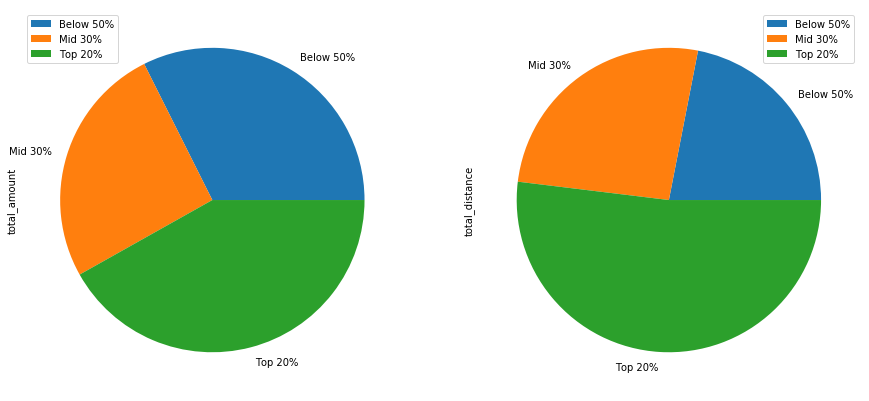

In [21]:
df = pd.DataFrame({'total_distance': [715707.26, 853211.0399999998, 1694545.31],
                  'total_amount': [5874042.170000002 , 4669996.34 , 7589940.450000001]},
                   index=['Below 50%', 'Mid 30%', 'Top 20%'])

total_distance = pd.DataFrame(data=df)
#total_distance.plot.pie(y='total_distance')
plot = df.plot.pie(subplots=True, figsize=(15, 7))

## Mean and Median trip distance grouped by hour of day.

We can see that trip distance mean of 5 am and 6 am are longest and trip distance are different by hour of day.

In [32]:
green_2015_09['tpep_pickup_hour'] = green_2015_09['lpep_pickup_datetime'].apply(lambda x: x[11:13])

In [33]:
green_info = green_2015_09[['tpep_pickup_hour','Trip_distance']].groupby(['tpep_pickup_hour']).agg(['mean','median']).reset_index()

We could see that trip distance mean of 5 am and 6 am are longest and trip distance are different by hour of day.

In [39]:
green_info

tpep_pickup_hour Trip_distance       
                             mean median
0                00      3.115276   2.20
1                01      3.017347   2.12
2                02      3.046176   2.14
3                03      3.212945   2.20
4                04      3.526555   2.36
5                05      4.133474   2.90
6                06      4.055149   2.84
7                07      3.284394   2.17
8                08      3.048450   1.98
9                09      2.999105   1.96
10               10      2.944482   1.92
11               11      2.912015   1.88
12               12      2.903065   1.89
13               13      2.878294   1.84
14               14      2.864304   1.83
15               15      2.857040   1.81
16               16      2.779852   1.80
17               17      2.679114   1.78
18               18      2.653222   1.80
19               19      2.715597   1.85
20               20      2.777052   1.90
21               21      2.999189   2.03
22               22      3.185394   2.20
23               23      3.191538   2.22

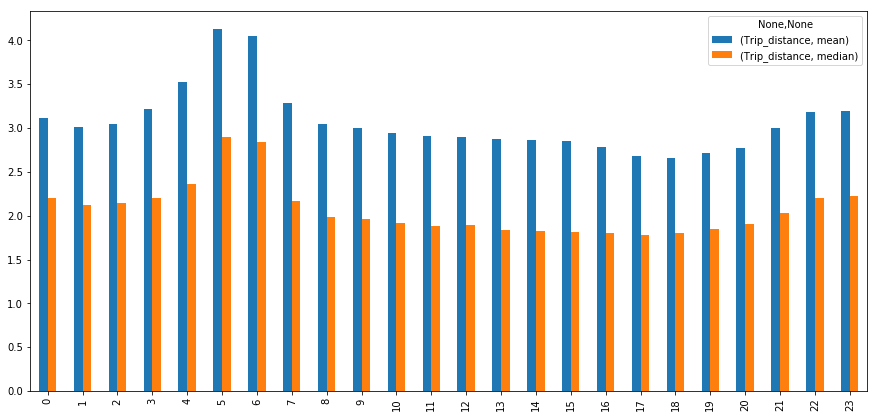

In [38]:
green_info.plot.bar(figsize=(15, 7))

# Airport

To get a list trips for NYC area airports (JFK, Newark), I used a final ratecode info (RateCodeID =2,3). 
When we check the dropoff location of the trips whose RateCodeID =2,3, we could see that most of them are located at JFK and Newark airport. However, there could be some trips that taxi drivers didn't need to use their taximeter such as a trip with flat fares, I didn't remove the cases whose dropoff locations are not around JFK and Newark airport but RateCodeID =2,3.

### Summary 

1. The number of trips/trasactions for Airport: 5552
2. The average total amount for Airport trips:  \$ 57.2
3. The average tip amount for Airport trips: \$ 4.35 



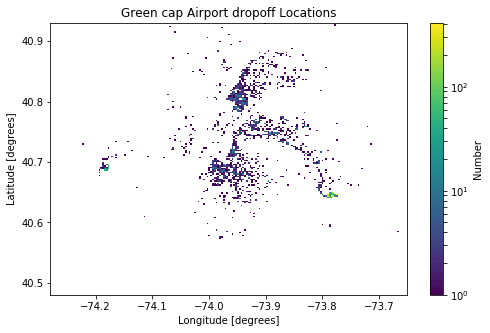

In [85]:
from matplotlib.colors import LogNorm
green_airport_rides = green_2015_09[(green_2015_09['RateCodeID'] == 2) | (green_2015_09['RateCodeID'] == 3)]
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
fig = plt.figure(1, figsize=(8,5) )
hist = plt.hist2d(green_airport_rides['Dropoff_longitude'],green_airport_rides['Dropoff_latitude'],bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Green cap Airport dropoff Locations')
plt.colorbar(label='Number')
plt.show()

In [46]:
print "The Number of trips/trasactions  of green cap:", green_airport_rides.shape[0]

The Number of trips/trasactions  of green cap: 5552


In [47]:
#print "The average fare of yellow cap: $", yellow_airport_rides['total_amount'].mean(), yellow_airport_rides['fare_amount'].mean(), yellow_airport_rides['tip_amount'].mean()
print "The average fare of green cap: $", green_airport_rides['Total_amount'].mean(), green_airport_rides['Fare_amount'].mean() ,green_airport_rides['Tip_amount'].mean()

The average fare of green cap: $ 57.208420389048996 48.976945244956774 4.353515850144093


## Number of transaction by hours

As you can see, 3:00 pm ~ 4:00 pm were the busiest hours for airport trips while 6:00 pm ~ 7:00 pm were the busiest in other trips. 
<br>
Among airport trips , we could see the number of transactions by hourse are different by the airports.
The trips for Newark airport were busiest between 2:00 pm ~ 3:00 pm while trips for JFK were busiest between 3:00 pm ~ 4:00 pm 

In [86]:
#green_2015_09
green_nonairport_rides = green_2015_09[(green_2015_09['RateCodeID'] != 2) & (green_2015_09['RateCodeID'] != 3)]
hour_transaction = green_nonairport_rides[['tpep_pickup_hour','VendorID']].groupby('tpep_pickup_hour').agg('count').reset_index().rename(columns={"VendorID":"Num of non-airport transactions"})

In [89]:
#Num of airport transactions
green_result = green_airport_rides[['tpep_pickup_hour','VendorID']].groupby('tpep_pickup_hour').agg('count').reset_index().rename(columns={"VendorID":"Num of airport transactions"})

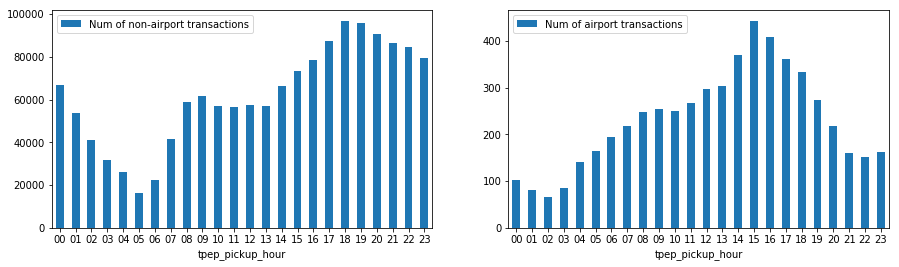

In [91]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
hour_transaction.plot.bar(x='tpep_pickup_hour', y='Num of non-airport transactions', rot=0, ax=ax[0])
green_result.plot.bar(x='tpep_pickup_hour', y='Num of airport transactions', rot=0, ax=ax[1])

In [71]:
green_jfk=  green_2015_09[(green_2015_09['RateCodeID'] == 2) ] 
                         

In [72]:
green_jfk_2 = green_jfk[['tpep_pickup_hour','VendorID']].groupby('tpep_pickup_hour').agg('count').reset_index().rename(columns={"VendorID":"Num of JFK transactions"})

In [73]:
green_newark=  green_2015_09[(green_2015_09['RateCodeID'] == 3) ] 
green_newark_2 = green_newark[['tpep_pickup_hour','VendorID']].groupby('tpep_pickup_hour').agg('count').reset_index().rename(columns={"VendorID":"Num of Newark transactions"})                       

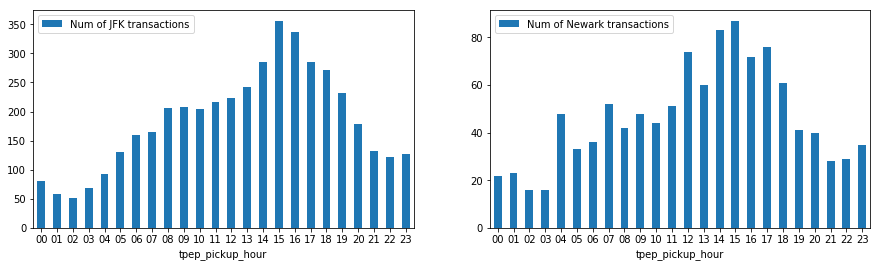

In [75]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
green_jfk_2.plot.bar(x='tpep_pickup_hour', y='Num of JFK transactions', rot=0, ax=ax[0]) 
green_newark_2.plot.bar(x='tpep_pickup_hour', y='Num of Newark transactions', rot=0, ax=ax[1])   